In [2]:
#importing required libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

#function to calculated squared loss
def squared_loss(X_test,Y_test,m,c):
    n = len(X_test)
    Y_pred = m*X_test+c
    sq_diff = np.multiply(np.add(Y_pred,-Y_test),np.add(Y_pred,-Y_test)) #array of squared diff of y predicted and y actual
    loss = (1/n)*np.sum(sq_diff)
    return loss

In [3]:
#creating random dataset
x = np.random.uniform(-5,10,1000)
x_train = x[:-300]
x_test = x[-300:]

In [4]:
#creating random slope and y-intercept to get random labels 
m = np.random.normal(5,2,1000)
c = np.random.normal(-3,2,1000)
y = np.add(m*x,c)
y_train = y[:-300]
y_test = y[-300:]

Text(0, 0.5, 'y')

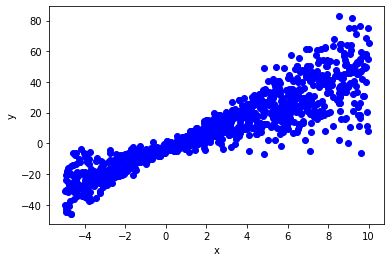

In [5]:
#plotting
plt.scatter(x,y,c='blue')
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

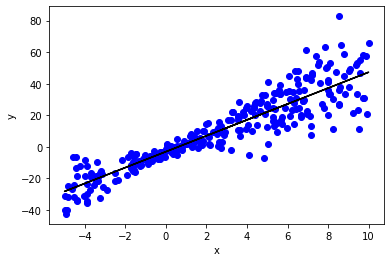

In [6]:
#Using scikit's learn linear regression
mod = LinearRegression()
mod.fit(x_train.reshape(-1,1),y_train)
y_pred = mod.predict(x_test.reshape(-1,1))
y_train_pred = mod.predict(x_train.reshape(-1,1))
plt.scatter(x_test,y_test,c='blue')
plt.plot(x_test,y_pred,c='black')
plt.xlabel("x")
plt.ylabel("y")

In [7]:
#Batch Gradient Descent

def batch_gd(m_init,c_init,epochs,alpha,X_train,Y_train,epsilon):
    m = m_init
    c = c_init
    n = len(X_train)
    l = np.empty(1000)
    m_update = epsilon
    for i in range(epochs):
        l[i] = squared_loss(X_train,Y_train,m,c)
        Y_pred_train = m*X_train + c
        m_update = (2/n)*(np.sum(np.multiply(np.add(Y_pred_train,-1*Y_train),X_train)))#updates using partial derivatives of m and c
        c_update = (2/n)*(np.sum(np.add(Y_pred_train,-1*Y_train)))
        if abs(m_update) < epsilon:
            break #breaking if update is too small
        else:    
            m = m-(alpha*m_update)
            c = c-(alpha*c_update)
    
    return m,c,l               
                    
                       
    

(4.452203475307779, -0.8207500375812598)

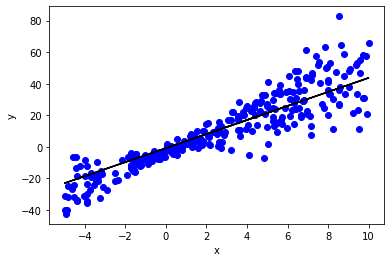

In [8]:
alpha_val = [0.0000001,0.0000005,0.1,0.5] #alpha is a hyperparameter,so possible alpha values
alpha = 0.00005
e_bgd = 1000 #number of epochs
m_init = 1
c_init = -1
eps = 0.5
                       
m_f,c_f,loss_bgd = batch_gd(m_init,c_init,e_bgd,alpha,x_train,y_train,eps)
y_pred = m_f*x_test+c_f
plt.scatter(x_test,y_test,c='blue')
plt.plot(x_test,y_pred,c='black')
plt.xlabel("x")
plt.ylabel("y")
m_f,c_f   
                       
                    

In [9]:
#Mini_batch GD
def mini_batch_gd(m_init,c_init,epochs,alpha,X_train,Y_train,epsilon,b_size):
    
    b = math.floor(len(X_train)/b_size) #number of batches
    m = m_init
    c = c_init
    l = np.empty(1000)
    for e in range(epochs):
        m_update = epsilon #initializing m_update
        l[e] = squared_loss(X_train,Y_train,m,c)
        if abs(m_update) < epsilon:
            break #breaking if update is too small
        else:    
            for i in range(b):
                x_batch = X_train[i*b_size:(i+1)*b_size]
                y_batch = Y_train[i*b_size:(i+1)*b_size]
                n = len(x_batch)
                y_pred_batch = m*x_batch + c
                m_update = (2/n)*(np.sum(np.multiply(np.add(y_pred_batch,-y_batch),x_batch)))
                c_update = (2/n)*(np.sum(np.add(y_pred_batch,-y_batch)))
                m = m-(alpha*m_update)
                c = c-(alpha*c_update)
    return m,c,l                

(4.671209142826205, -0.8668241060219953)

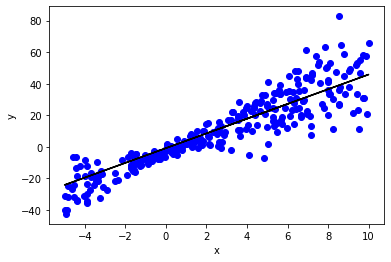

In [10]:
alpha = 0.00005
e_mini_bgd = 200 #number of epochs
m_init = 1
c_init = -1
eps = 0.01
                       
m_f,c_f,loss_mini_bgd =mini_batch_gd(m_init,c_init,e_mini_bgd,alpha,x_train,y_train,eps,100)
y_pred = m_f*x_test+c_f
plt.scatter(x_test,y_test,c='blue')
plt.plot(x_test,y_pred,c='black')
plt.xlabel("x")
plt.ylabel("y")
loss_mini_bgd = loss_mini_bgd[:e_mini_bgd]
m_f,c_f

In [11]:
#Stochastic GD
def stoch_gd(m_init,c_init,epochs,alpha,X_train,Y_train,epsilon):
    m = m_init
    c = c_init
    l = np.empty(1000)
    for e in range(epochs):
        l[e] = squared_loss(X_train,Y_train,m,c)
        m_update = epsilon #initializing m_update
        if abs(m_update) < epsilon:
            break #breaking if update is too small
        else:
            for i in range(len(X_train)):
                m_update = 2*X_train[i]*(((m*X_train[i])+c)-Y_train[i])
                c_update = 2*(((m*X_train[i])+c)-Y_train[i])
                m = m - (alpha*m_update)
                c = c - (alpha*c_update)
    return m,c,l             

(4.742738855499364, -1.6391410760031035)

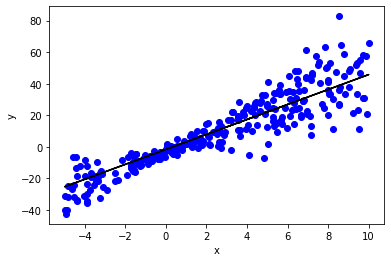

In [12]:
alpha = 0.00005
e_sgd = 10 #number of epochs
m_init = 1
c_init = -1
eps = 0.01
                       
m_f,c_f,loss_sgd = stoch_gd(m_init,c_init,e_sgd,alpha,x_train,y_train,eps)
y_pred = m_f*x_test+c_f
plt.scatter(x_test,y_test,c='blue')
plt.plot(x_test,y_pred,c='black')
plt.xlabel("x")
plt.ylabel("y")
loss_sgd = loss_sgd[:e_sgd]
m_f,c_f

Average squared loss after  1000 epochs is  109.85945729561534


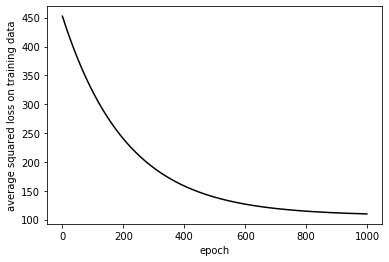

In [13]:
#Comparision between each implementation

#Batch GD epoch vs training_loss graph
e1 = np.arange(e_bgd)
plt.plot(e1,loss_bgd,c='black')
plt.xlabel("epoch")
plt.ylabel("average squared loss on training data")
print("Average squared loss after ",e_bgd, "epochs is ",loss_bgd[e_bgd-1])

Average squared loss after 200 epochs is 107.17268634954131


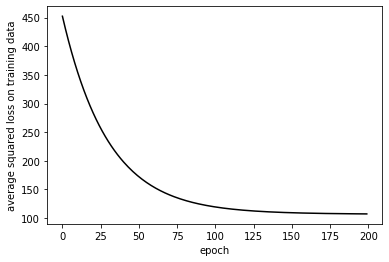

In [14]:
#Mini_Batch GD epoch vs training_loss graph
e2 = np.arange(e_mini_bgd)
plt.plot(e2,loss_mini_bgd,c='black')
plt.xlabel("epoch")
plt.ylabel("average squared loss on training data")
print("Average squared loss after", e_mini_bgd, "epochs is",loss_mini_bgd[e_mini_bgd-1])

Average squared loss after  10 epochs is  105.22657813357664


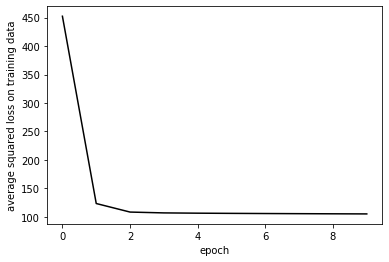

In [15]:
#Stochastic GD epoch vs training_loss graph
e3 = np.arange(e_sgd)
plt.plot(e3,loss_sgd,c='black')
plt.xlabel("epoch")
plt.ylabel("average squared loss on training data")
print("Average squared loss after ", e_sgd, "epochs is ",loss_sgd[e_sgd-1])

In [16]:
#scikit learn training_loss calculation
n = len(x_train)
squared_diff = np.multiply(np.add(y_train,-y_train_pred),np.add(y_train,-y_train_pred))
sk_loss = (1/n)*np.sum(squared_diff)
print("Average squared loss for sci-kit learn's Linear Regression is",sk_loss)


Average squared loss for sci-kit learn's Linear Regression is 102.9093274925743


# Summary:

For Linear Regression on randomly generated linear data:

1)Batch Gradient Descent performed the worst and took all of 1000 epochs to get Average Squared Loss close to 100

2)MiniBatch Gradient Descent performed fairly well and was able to reduce squared loss more than Batch GD in just 200 epochs

3)Stochastic GD and SK_learn's Linear Regression performed very similarly and SGD reduced loss more than both MiniBatch and Batch GD in JUST 10 EPOCHS.